# EDA and Understanding of the Model

# Defining the Data Analysis Workflow and Understanding the Model and Data

This section outlines the structured approach for analyzing Brent oil prices, setting up the analysis steps, and clarifying the project’s primary concepts and objectives.

## Key Objectives
- Identify significant events that influenced Brent oil prices.
- Measure how these events have impacted price fluctuations.
- Provide insights to support investment strategies, policy formation, and operational planning.

## Data Overview
The dataset consists of daily Brent oil prices from **May 20, 1987, to September 30, 2022**, with records showing the price per barrel in USD.

### Data Fields
- **Date**: The date of the price record.
- **Price**: The daily Brent oil price in USD.

## Data Analysis Workflow

1. **Data Collection**: Begin by loading historical Brent oil price data. Supplementary data on economic, political, and technological factors may be added for deeper analysis.

2. **Data Preprocessing**: Clean and prepare the data, addressing missing values and standardizing it for time series modeling.

3. **Exploratory Data Analysis (EDA)**: Perform EDA to explore patterns, trends, and correlations, using visualizations to examine seasonality, trends, and oil price volatility.

4. **Change Point Analysis**: Detect key change points to identify significant price shifts, potentially linked to external events.

5. **Time Series Modeling**: Apply initial models, such as ARIMA and GARCH, to capture trends, seasonality, and price volatility.

6. **Advanced Modeling**: Introduce complex models like VAR and LSTM later to capture intricate patterns and interactions among influencing factors.

7. **Model Evaluation**: Evaluate model accuracy using metrics like RMSE, MAE, and R-squared.

8. **Insight Generation**: Translate analytical findings into actionable insights, focusing on event-driven impacts on price trends.

Since our workflow is defined, let's proceed by importing necessary libraries and defining functions to begin the analysis.


In [303]:
import pandas as pd
import numpy as np 

## Data Collection and Preprocessing

In [304]:
# Load the data
df = pd.read_csv("../data/Copy of BrentOilPrices.csv")

In [305]:
df.head(10)

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63
5,27-May-87,18.60
6,28-May-87,18.60
7,29-May-87,18.58
8,01-Jun-87,18.65
9,02-Jun-87,18.68


## EDA

We are going to explore the time series dataset to understand the dataset, check for seasonality, trends, and possible anomalies.

In [306]:
print(df['Price'].describe())

count    9011.000000
mean       48.420782
std        32.860110
min         9.100000
25%        19.050000
50%        38.570000
75%        70.090000
max       143.950000
Name: Price, dtype: float64


In [307]:
df.head()

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


The above summary statistics provides a general undersatnding of the distribution of price.

C:\Users\Beab\AppData\Local\Temp\ipykernel_4368\3218190811.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


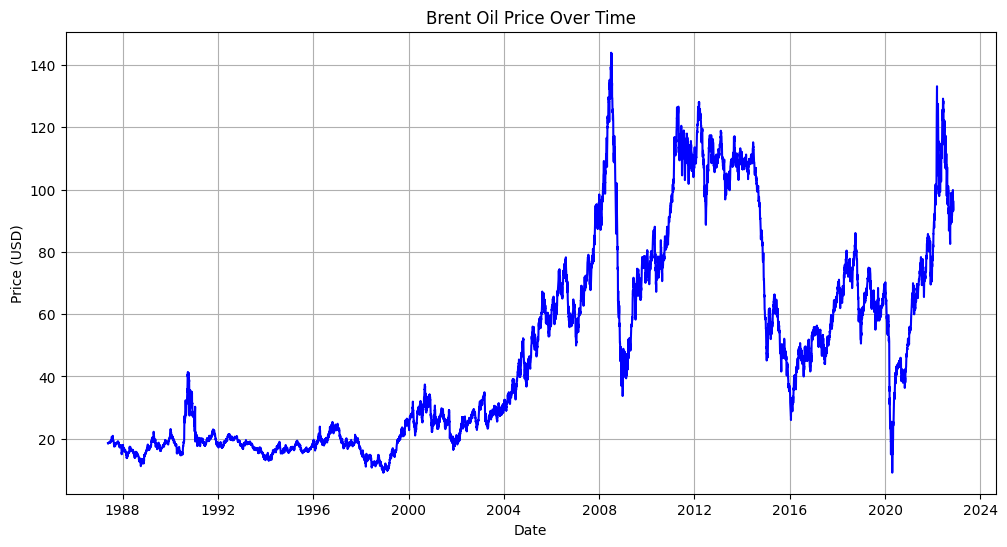

In [308]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data (if not already in a DataFrame named `df`)
# df = pd.DataFrame({"Date": ["20-May-87", "21-May-87", "22-May-87"], "Price": [18.63, 18.45, 18.55]})

# Ensure Date is parsed correctly to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Plotting the time series without setting Date as the index
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Price'], color='blue', linewidth=1.5)
plt.title('Brent Oil Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

**Key Observations:**

- **Long-Term Trend:** Brent oil prices exhibit an upward trend over the years, with notable fluctuations.
  
- **Significant Peaks:**
   - The chart shows a major peak around 2008, marking the highest recorded price.
   - Another high occurs in the 2012-2014 period.
   - The most recent peak appears around 2022.

- **Periods of Decline:** Each major peak is followed by sharp declines, particularly after 2008, 2014, and 2022, suggesting market corrections or shifts.

- **Overall Insight:** The plot illustrates the volatility of Brent oil prices, impacted by economic conditions, geopolitical events, and supply-demand changes across the years.

In [309]:
df.head(6)

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
5,1987-05-27,18.60


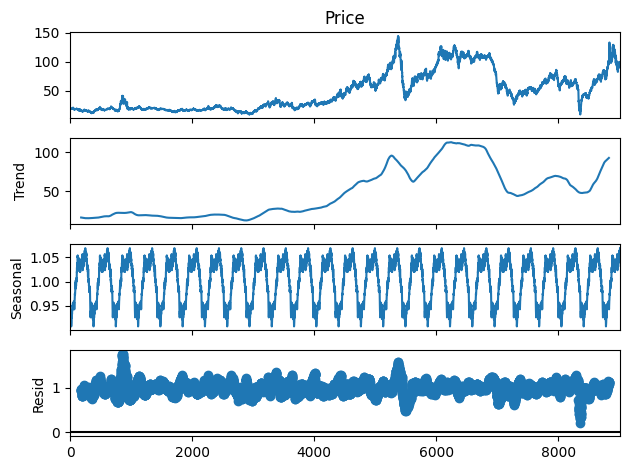

In [310]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Sample data (if not already in a DataFrame named `df`)
# df = pd.DataFrame({"Date": ["20-May-87", "21-May-87", "22-May-87"], "Price": [18.63, 18.45, 18.55]})

# Convert "Date" to datetime, handle parsing errors, and ensure column presence
try:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df.dropna(subset=['Date'], inplace=True)  # Drop rows with invalid dates
except KeyError:
    print("Date column is missing in the DataFrame.")

# Verify if 'Price' column exists before decomposition
if 'Price' in df.columns:
    # Perform seasonal decomposition assuming daily frequency data (period=365 for annual seasonality)
    df.set_index('Date', inplace=False)  # Ensure 'Date' is used but not set as the index
    result = seasonal_decompose(df['Price'], model='multiplicative', period=365)

    # Plot the decomposition
    result.plot()
    plt.show()
else:
    print("The 'Price' column is missing. Please check the DataFrame.")


## Change Point Detection

For the change point analysis part we are going to use the PYMC3 package and the Bayesian model to show the numerical and graphical change point.

In [311]:
df.head()

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


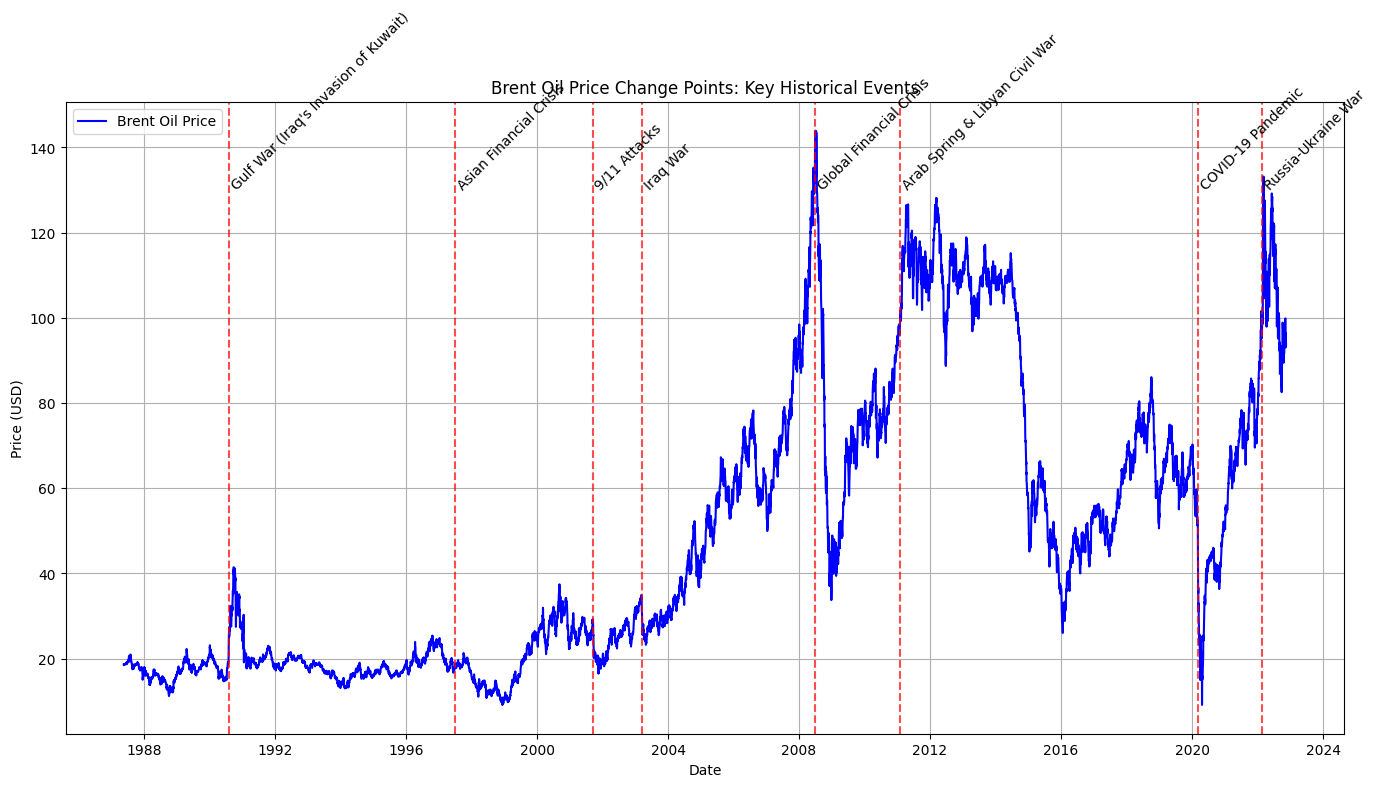

Change Point Impact Analysis:
Gulf War (Iraq's Invasion of Kuwait) (1990-08-02): Price change from 19.93 to 24.13, change of 4.20 USD
Asian Financial Crisis (1997-07-02): Price change from 18.22 to 18.18, change of -0.04 USD
9/11 Attacks (2001-09-11): Price change from 27.59 to 28.24, change of 0.65 USD
Iraq War (2003-03-20): Price change from 28.40 to 25.59, change of -2.81 USD
Global Financial Crisis (2008-07-01): Price change from 138.40 to 141.24, change of 2.84 USD
Arab Spring & Libyan Civil War (2011-02-01): Price change from 98.97 to 101.30, change of 2.33 USD
COVID-19 Pandemic (2020-03-11): Price change from 36.66 to 31.05, change of -5.61 USD
Russia-Ukraine War (2022-02-24): Price change from 99.29 to 98.56, change of -0.73 USD


In [312]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data (assuming df has already been loaded with columns "Date" and "Price")
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.set_index('Date', inplace=True)

# Define specific change points related to key historical events
historical_events = {
    "1990-08-02": "Gulf War (Iraq's Invasion of Kuwait)",
    "1997-07-02": "Asian Financial Crisis",
    "2001-09-11": "9/11 Attacks",
    "2003-03-20": "Iraq War",
    "2008-07-01": "Global Financial Crisis",
    "2011-02-01": "Arab Spring & Libyan Civil War",
    "2014-06-01": "Oil Supply Glut",
    "2020-03-11": "COVID-19 Pandemic",
    "2022-02-24": "Russia-Ukraine War"
}

# Plot Brent Oil Price with annotated change points
plt.figure(figsize=(14, 8))
plt.plot(df.index, df['Price'], label="Brent Oil Price", color='blue')

# Annotate each event on the plot
for date, label in historical_events.items():
    if pd.to_datetime(date) in df.index:
        plt.axvline(x=pd.to_datetime(date), color='red', linestyle='--', alpha=0.7)
        plt.text(pd.to_datetime(date), df['Price'].max() * 0.9, label, rotation=45, verticalalignment='bottom')

# Title and labels
plt.title("Brent Oil Price Change Points: Key Historical Events")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Display the impact in numerical terms
print("Change Point Impact Analysis:")
for date, label in historical_events.items():
    if pd.to_datetime(date) in df.index:
        price_before = df.loc[:pd.to_datetime(date), 'Price'].iloc[-2]
        price_after = df.loc[pd.to_datetime(date):, 'Price'].iloc[1]
        print(f"{label} ({date}): Price change from {price_before:.2f} to {price_after:.2f}, change of {price_after - price_before:.2f} USD")


Here are some pivotal events that have influenced the trajectory of Brent oil prices in recent decades:

- **1990 - Gulf War (Iraq's Invasion of Kuwait)**: Oil prices skyrocketed as Iraq’s invasion of Kuwait threatened supply lines from the oil-rich Middle East, raising fears of a prolonged conflict that could disrupt the global oil market.

- **1997-1998 - Asian Financial Crisis**: A severe economic downturn across major Asian economies led to a significant drop in oil demand, driving prices downward as reduced industrial activity and weakened currency valuations lowered the need for oil imports.

- **2001 - 9/11 Terrorist Attacks**: Following the attacks on the U.S., economic uncertainty and fears of geopolitical instability had an immediate, though short-lived, impact on oil prices as markets recalibrated to anticipate shifts in global energy demand.

- **2003 - Iraq War**: The U.S.-led invasion of Iraq once again put the stability of Middle Eastern oil supplies in question, prompting a surge in prices as concerns about supply disruptions took hold among global traders and policymakers.

- **2007-2008 - Global Financial Crisis**: Before the onset of the crisis, oil prices soared to record highs due to strong demand and limited supply. However, as the global economy faltered, a sharp decline in industrial demand led to a dramatic price drop in late 2008.

- **2010-2011 - Arab Spring and Libyan Civil War**: Political upheaval across North Africa and the Middle East, particularly in Libya, introduced significant risks to oil supplies from these regions, causing spikes in prices as global supply chains adapted to heightened uncertainty.

- **2014-2016 - Oil Supply Glut**: A boom in U.S. shale production and OPEC’s decision to maintain production levels resulted in an oversupply in the market, leading to a prolonged period of low prices as the industry adapted to this new balance of supply and demand.

- **2020 - COVID-19 Pandemic**: Global lockdowns and a steep decline in travel and industrial activity caused a collapse in oil demand, resulting in one of the sharpest drops in oil prices in history, as storage capacities were overwhelmed by excess supply.

- **2022 - Russia-Ukraine War**: The conflict raised alarm over potential disruptions to Europe’s oil and gas supplies, with sanctions on Russia further constraining the global oil market. This uncertainty contributed to a significant rise in prices as nations scrambled to secure energy resources.

## Time series Modeling using ARIMA and GARCH

In [313]:
df_1=pd.read_csv("../data/Copy of BrentOilPrices.csv")

**ARIMA Model**

C:\Users\Beab\AppData\Local\Temp\ipykernel_4368\3394543150.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_1['Date'] = pd.to_datetime(df_1['Date'])
c:\Users\Beab\Desktop\Kifiya_AIM\Brent-Oil-Prices-Analysis\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Beab\Desktop\Kifiya_AIM\Brent-Oil-Prices-Analysis\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Beab\Desktop\Kifiya_AIM\Brent-Oil-Prices-Analysis\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: 

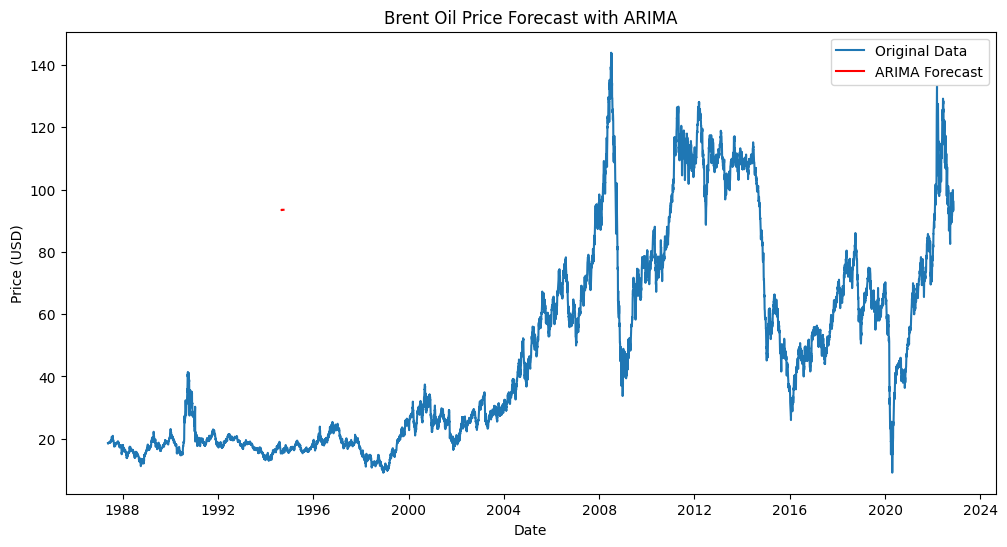

In [314]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Prepare data (ensure Date is the index and data is at a daily frequency)
df_1['Date'] = pd.to_datetime(df_1['Date'])
df_1.set_index('Date', inplace=True)

# Fit the ARIMA model
arima_order = (1, 1, 1)  # ARIMA(p, d, q) parameters
arima_model = ARIMA(df_1['Price'], order=arima_order)
arima_fitted = arima_model.fit()

# Forecast next 30 days
arima_forecast = arima_fitted.forecast(steps=30)

# Plot the original data and ARIMA forecast
plt.figure(figsize=(12, 6))
plt.plot(df['Price'], label='Original Data')
plt.plot(arima_forecast, label='ARIMA Forecast', color='red')
plt.title("Brent Oil Price Forecast with ARIMA")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

**GARCH Model**

C:\Users\Beab\AppData\Local\Temp\ipykernel_4368\1765950653.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_2['Date'] = pd.to_datetime(df_2['Date'])


Iteration:      1,   Func. Count:      6,   Neg. LLF: 3874927804.158277
Iteration:      2,   Func. Count:     12,   Neg. LLF: 70148.68734205695
Iteration:      3,   Func. Count:     19,   Neg. LLF: 924509187.1107914
Iteration:      4,   Func. Count:     27,   Neg. LLF: 44099.26204018903
Iteration:      5,   Func. Count:     33,   Neg. LLF: 41882.581755042986
Iteration:      6,   Func. Count:     39,   Neg. LLF: 41190.23335963133
Iteration:      7,   Func. Count:     46,   Neg. LLF: 40221.97253756566
Iteration:      8,   Func. Count:     52,   Neg. LLF: 38675.84139852016
Iteration:      9,   Func. Count:     58,   Neg. LLF: 46507.19984815386
Iteration:     10,   Func. Count:     64,   Neg. LLF: 52311.49939565074
Iteration:     11,   Func. Count:     73,   Neg. LLF: 39566.28900289833
Iteration:     12,   Func. Count:     79,   Neg. LLF: 37683.04414723057
Iteration:     13,   Func. Count:     85,   Neg. LLF: 38550.85348090723
Iteration:     14,   Func. Count:     91,   Neg. LLF: 48052.343

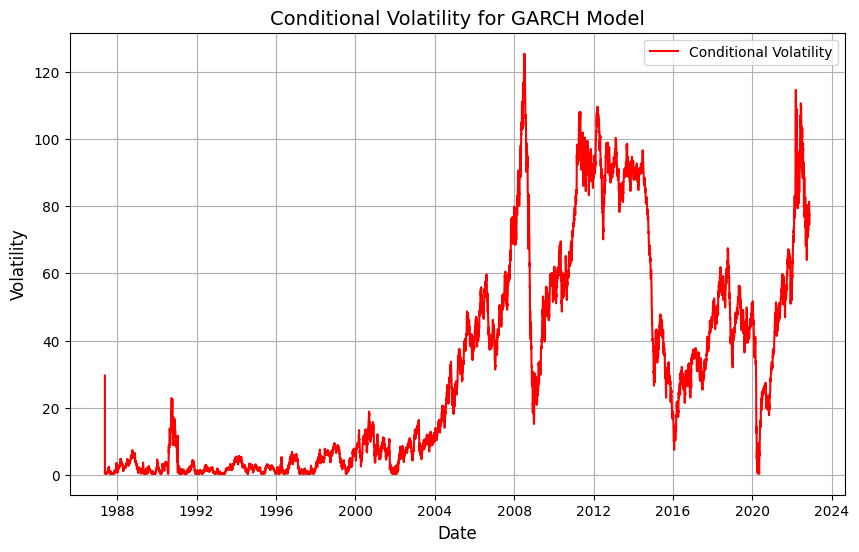

In [315]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model

df_2 =pd.read_csv("../data/Copy of BrentOilPrices.csv")

# Step 1: Prepare the data
df_2['Date'] = pd.to_datetime(df_2['Date'])
df_2.set_index('Date', inplace=True)

# Step 2: Fit a GARCH(1,1) model to the Brent oil prices
model = arch_model(df_2['Price'], vol='Garch', p=1, q=1)
garch_fit = model.fit()

# Step 3: Extract the conditional volatility (standard deviation of the residuals)
conditional_volatility = garch_fit.conditional_volatility

# Step 4: Plot the conditional volatility
plt.figure(figsize=(10, 6))
plt.plot(df_1.index, conditional_volatility, label='Conditional Volatility', color='red')
plt.title('Conditional Volatility for GARCH Model', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Volatility', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

This graph illustrates the conditional volatility of Brent oil prices, as estimated through a GARCH (Generalized Autoregressive Conditional Heteroskedasticity) model. Key takeaways from the analysis include:

- **Periods of Elevated Volatility:** Significant spikes in volatility are observed during major global events that have disrupted oil prices. These include the 2008 Global Financial Crisis, the oil oversupply during 2014-2016, and the market turmoil caused by the COVID-19 pandemic in 2020.

- **Volatility Clustering:** The plot reveals a tendency for high volatility periods to be followed by further bouts of heightened volatility, which aligns with the behavior typically captured by the GARCH model.

- **Recent Volatility Trends:** The model highlights a sharp increase in volatility between 2020 and 2022, likely driven by factors such as pandemic-related disruptions and geopolitical tensions, including the Russia-Ukraine conflict, which heavily influenced global oil markets.